## 02-Lab - K-Means Clustering

This is the dataset of wheat seeds for various varieties.
The dataset contains 209 randomly selected instances of wheat seed information.

Here is the description of the fields.

1. area A, 
2. perimeter P, 
3. compactness $C = 4*pi*A/P^2$, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
All of these parameters were real-valued continuous.

You are required us asymmetry coefficient and perimeter features to perform k-means and identify the two clusters. Use the elbow and silhoutte methods to show what are the optimal number of clusters. 

In [1]:
# Use kmeans clustering

import pandas as pd
columns = ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel','asymmetry', 'length_groove','class']
seeds = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/seeds_dataset.csv', names=columns ).dropna()


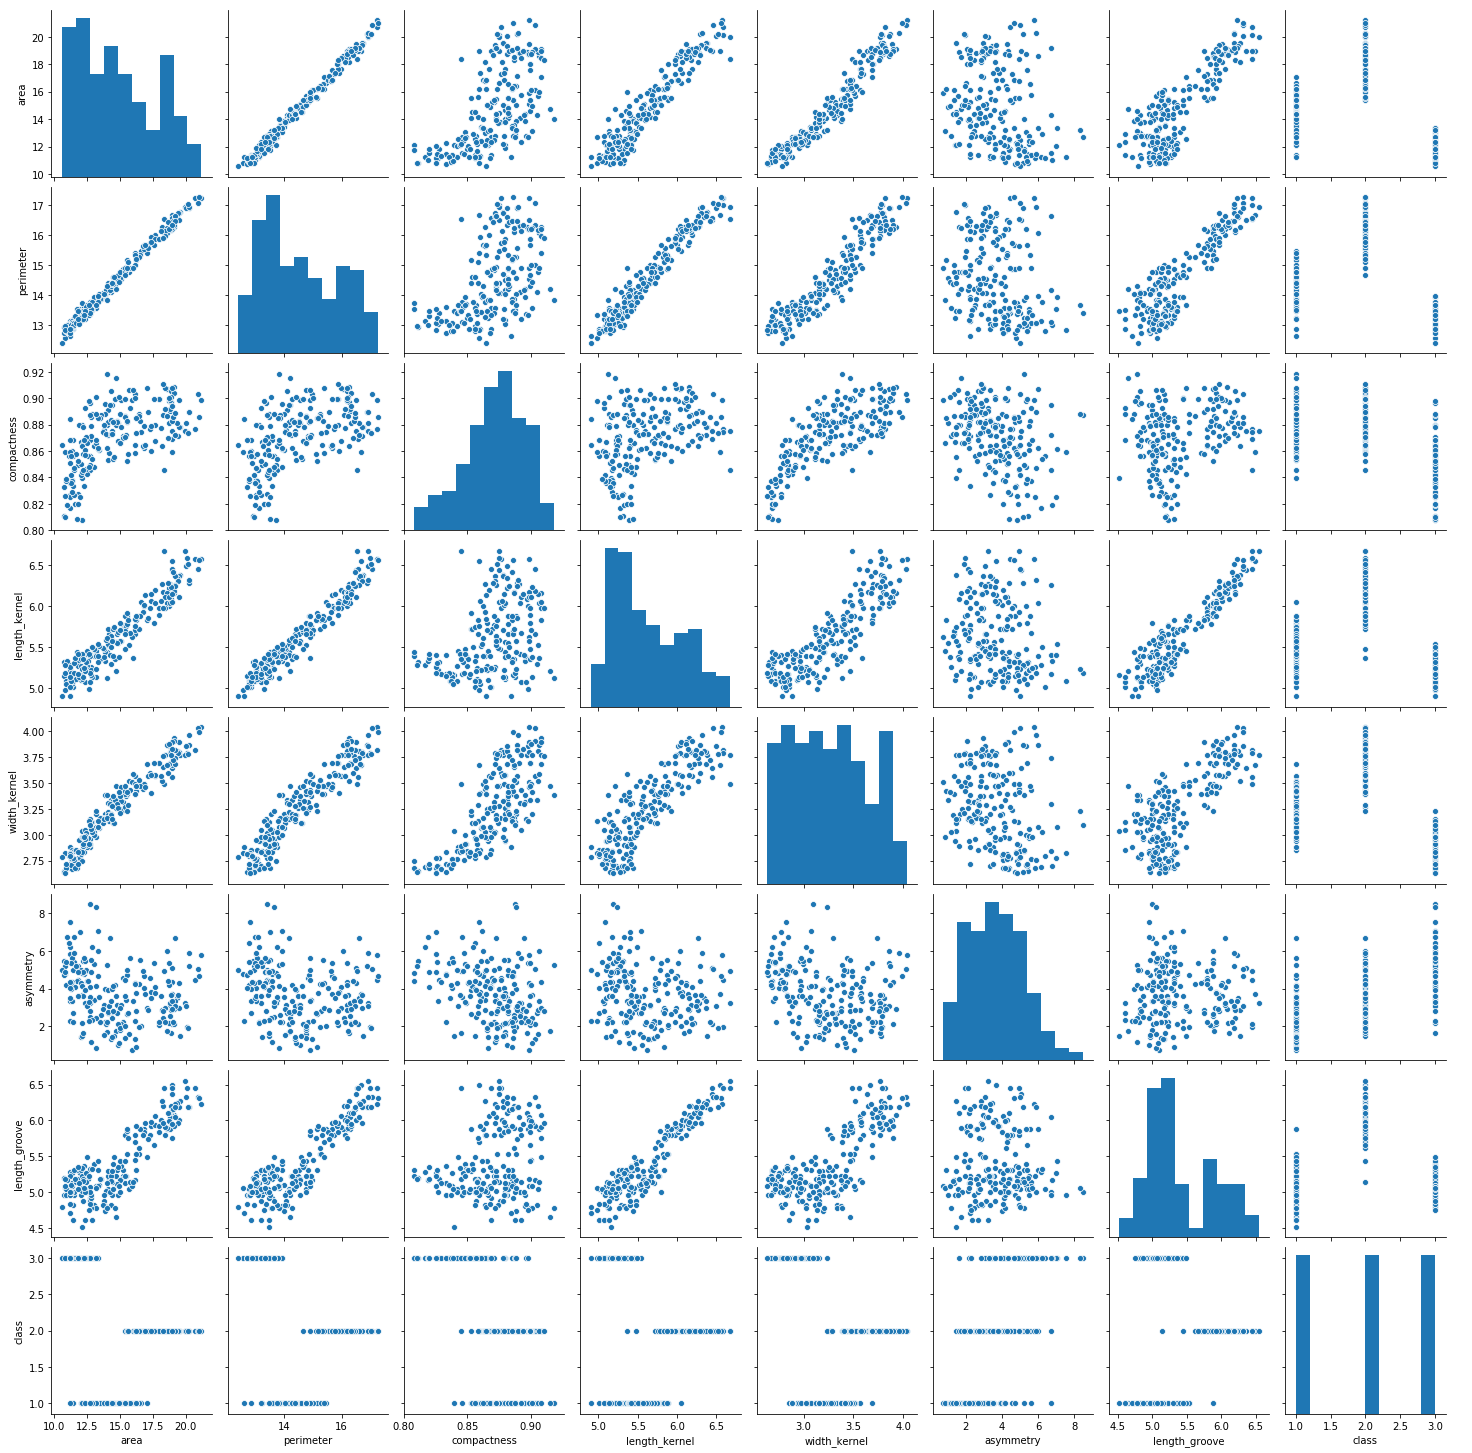

In [2]:
import seaborn as sns 
sns.pairplot(seeds)

Looking at the pair plot a simple example of visualizing clustering is asymmetry vs perimeter. We shall visualize the dataset and perform k-means clustering. 


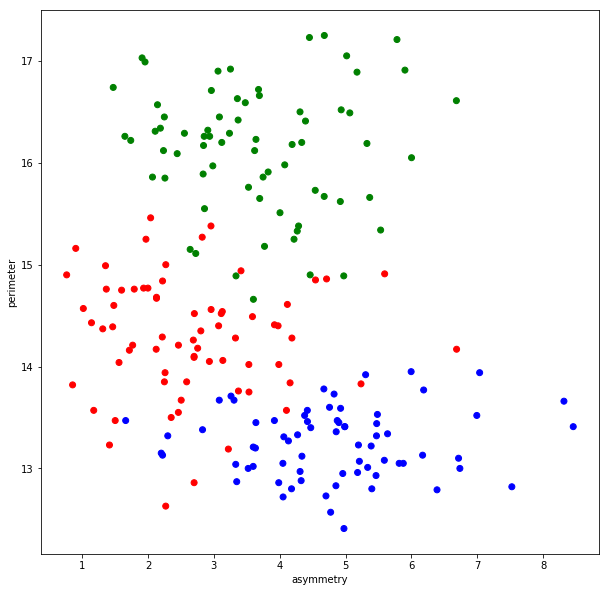

In [3]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

# plotting asymmetry vs perimeter. We are choosing these two parameters
data_set = seeds[['asymmetry', 'perimeter','class']]
x = data_set["asymmetry"]
y = data_set["perimeter"]

# plotting asymmetry vs perimeter
colors =["red", "green","blue"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(x,y, c=data_set['class'], cmap=cmap)
plt.xlabel('asymmetry')
plt.ylabel('perimeter')
plt.show()

<img src="../../../images/asymvsperi.png">

We are first going to do use k means on this dataset with 2 clusters. Then use elbow method and silhoutte method to see what results we get 

In [13]:
# simple kmeans
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

train_data_full, test_data = train_test_split(data_set, test_size=0.10, random_state=12)
train_data = train_data_full.drop(columns='class')

train_shape = train_data.shape
print("Shape of training set is {}".format(train_shape))

Shape of training set is (189, 2)


Shape of training set is (189, 2)

In [15]:
kmeans = KMeans(n_clusters=2, random_state=12)
kmeans.fit(train_data)
y_train_pred = kmeans.predict(train_data)

unique_classes = np.unique(y_train_pred)
shape_y_pred = y_train_pred.shape

print("The predicted result for training has two unique classes {} and has shape {}".format(unique_classes, shape_y_pred))

The predicted result for training has two unique classes [0 1] and has shape (189,)


The predicted result for training has two unique classes [0 1] and has shape (189,)

There is one crucial point to note. We do not have a validation or evaluation criteria like we did before with supervised learning. In classification, we could use accuracy in regression we can use mean squared error. In unsupervised learning, there is no simple way of confirming it the model prediction is accurate or not. The easier way to do this would be to hand label certain points and then run the clustering algorithms to calculate the accuracy of of the points.


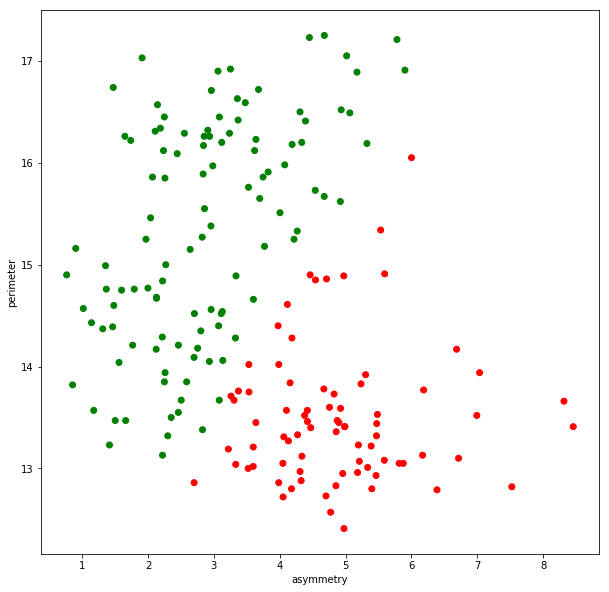

In [6]:
colors =["red", "green"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(train_data['asymmetry'].values, train_data['perimeter'].values, c=y_train_pred, cmap=cmap)
plt.xlabel('asymmetry')
plt.ylabel('perimeter')
plt.show()

<img src="../../../images/clusters_two.png">

Looking at the above plot, it seems that having two clusters is good enough. So we will use the elbow method and Silohutte method now to check if this is true


In [20]:
# elbow method 

num_of_clusters = [x for x in range(1,10)]
store_interia = []
store_centers =  []
get_models = []
for c in num_of_clusters: 
    kmeans = KMeans(n_clusters=c, random_state=12)
    kmeans.fit(train_data)
    intertia_value = kmeans.inertia_
    store_interia.append(intertia_value)
    
    centers = kmeans.cluster_centers_
    store_centers.append(centers)
    get_models.append(kmeans)
    

print("Maximum number of clusters are {}".format(len(store_interia)))

Maximum number of clusters are 9


Maximum number of clusters are 9


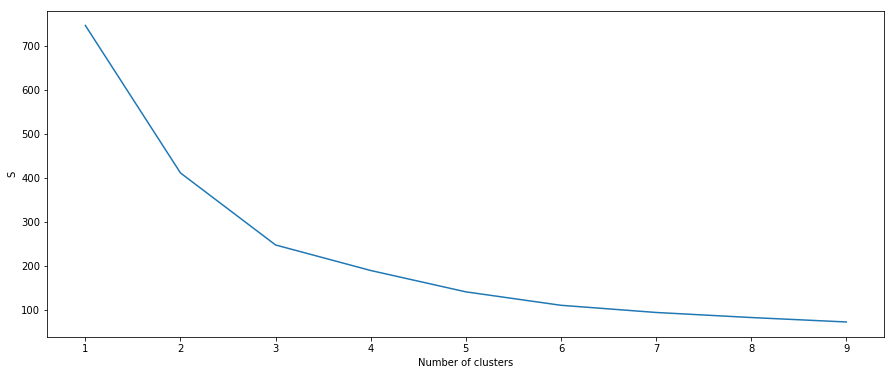

In [8]:
plt.figure(figsize=(15,6))
plt.plot(num_of_clusters, store_interia)
plt.xlabel('Number of clusters')
plt.ylabel('S')
plt.show()

<img src="../../../images/elbow_method_kmeans.png">

The inertia term is the sum of squares within a cluster. The plot above represents the change is sum of squares over  the number of clusters.The sum of squares decreases with an increase in the number of clusters. According to the elbow method. The optimal number of clusters is more around 3 or 4. 

Next, lets compute the Silhouette score.   

In [22]:
from sklearn.metrics import silhouette_score, accuracy_score

num_of_clusters = [x for x in range(2,10)]
store_sscore = []

for c in num_of_clusters: 
    kmeans = KMeans(n_clusters=c, random_state=12)
    kmeans.fit(train_data)
    labels = kmeans.labels_
    sscore = silhouette_score(train_data, labels)
    store_sscore.append(sscore)
    
print("Maximum number of clusters are {}".format(len(store_sscore)))

Maximum number of clusters are 8


Maximum number of clusters are 8.

We cannot calculate a Silhouette score for 1 cluster hence we have left it out. 


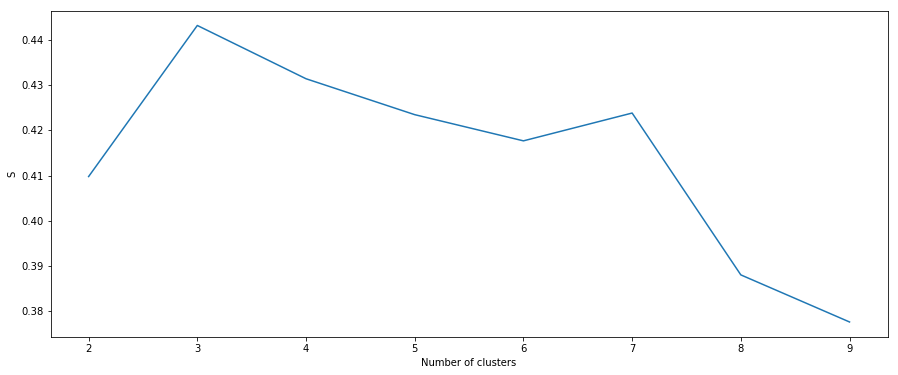

In [10]:
plt.figure(figsize=(15,6))
plt.plot(num_of_clusters, store_sscore)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.ylabel('S')
plt.show()

<img src="../../../images/silhouette_score.png">

In [27]:
max_indx = np.argmax(store_sscore)
optimal_number_clusters = num_of_clusters[max_indx]

print("Optimal number of clusters according to Silhouette method {} ".format(optimal_number_clusters))

Optimal number of clusters according to Silhouette method 3 


Optimal number of clusters according to Silhouette method 3 

The Silhouette score peaks at $n=3$ suggesting that 3 clusters are ideal for the training set. Comparing this to the elbow method where its hard to decipher where the 'elbow' of the curve. Lets plot the three clusters. 


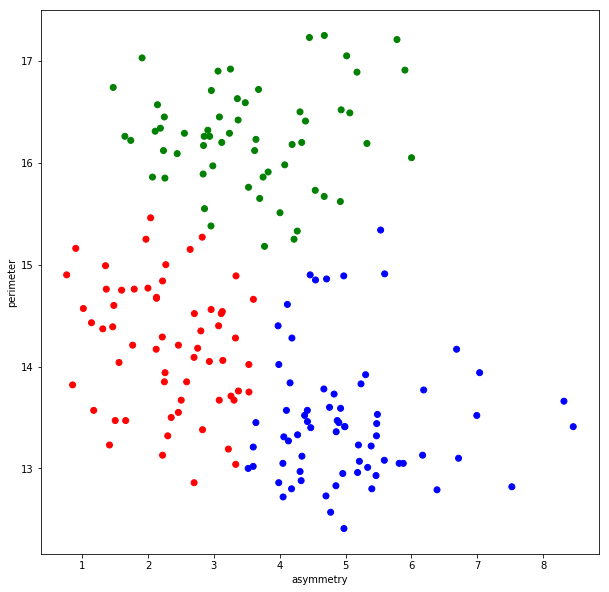

In [11]:
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(train_data)
labels = kmeans.labels_
colors =["green", "blue","red"]
cmap= ListedColormap(colors)
plt.figure(figsize=(10, 10))
plt.scatter(train_data['asymmetry'].values, train_data['perimeter'].values, c=labels, cmap=cmap)
plt.xlabel('asymmetry')
plt.ylabel('perimeter')
plt.show()

<img src="../../../images/final_kmeans.png">

So these are the three classes that we acquired. 